# Importing the libraries

In [1]:
import pyforest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, plot_roc_curve
from lightgbm import plot_importance
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns', None)

# Opening the csv file

In [2]:
rain = pd.read_csv('rain_data_aus.csv')
rain.head(10)

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,29.48,28.400000,12,5.115360,0.089825
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,32.12,2.208569,10,21.497100,0.023477
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,32.84,38.000000,17,20.782859,0.027580
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,35.60,21.200000,8,12.028646,0.023962
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,40.76,41.600000,9,11.883546,0.220164
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No,37.64,29.600000,8,17.320994,0.056883
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No,32.00,24.800000,8,19.791271,0.030004
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No,34.04,24.800000,7,7.207085,0.023000
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes,40.28,12.800000,19,1.540702,0.414649
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No,38.12,34.400000,7,8.259833,0.064945


In [3]:
wind_table_01 = pd.read_csv('wind_table_01.csv')
wind_table_02 = pd.read_csv('wind_table_02.csv')
wind_table_03 = pd.read_csv('wind_table_03.csv')
wind_table_04 = pd.read_csv('wind_table_04.csv')
wind_table_05 = pd.read_csv('wind_table_05.csv')
wind_table_06 = pd.read_csv('wind_table_06.csv')
wind_table_07 = pd.read_csv('wind_table_07.csv')
wind_table_08 = pd.read_csv('wind_table_08.csv')
wind = pd.concat([wind_table_01, wind_table_02, wind_table_03, wind_table_04, wind_table_05, wind_table_06, wind_table_07, wind_table_08], ignore_index = True)
wind

,date,location,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm
0,2007-11-01,Canberra,NW,30.0,SW,NW,6.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-11-02,Canberra,ENE,39.0,E,W,4.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-11-03,Canberra,NW,85.0,N,NNE,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2007-11-04,Canberra,NW,54.0,WNW,W,30.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-11-05,Canberra,SSE,50.0,SSE,ESE,20.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164381,2017-06-25,Perth,NaN,NaN,NaN,NaN,NaN,NaN,E,26.0,SE,SE,4.0,11.0
164382,2017-06-25,SalmonGums,NaN,NaN,NaN,NaN,NaN,NaN,SE,15.0,SSE,E,7.0,6.0
164383,2017-06-25,Walpole,NaN,NaN,NaN,NaN,NaN,NaN,SSW,20.0,WNW,SSW,6.0,6.0
164384,2017-06-25,Hobart,NaN,NaN,NaN,NaN,NaN,NaN,NW,50.0,NNW,NNW,17.0,28.0


In [4]:
cont = 2
for col in wind.columns[8:14]:
    wind.loc[~wind[col].isnull(), wind.columns[cont]] = wind.loc[~wind[col].isnull(), col]
    cont +=1
wind = wind.drop(['windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm', 'windspeed9am', 'windspeed3pm'], axis=1)

In [5]:
rain_merged = pd.merge(left=rain, right=wind, how='left', on=['date', 'location'])
rain_merged

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,29.48,28.400000,12,5.115360,0.089825,W,44.0,W,WNW,20.0,24.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,32.12,2.208569,10,21.497100,0.023477,WNW,44.0,NNW,WSW,4.0,22.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,32.84,38.000000,17,20.782859,0.027580,WSW,46.0,W,WSW,19.0,26.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,35.60,21.200000,8,12.028646,0.023962,NE,24.0,SE,E,11.0,9.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,40.76,41.600000,9,11.883546,0.220164,W,41.0,ENE,NW,7.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164381,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No,32.36,27.200000,9,19.715976,0.023350,NNW,22.0,SE,N,13.0,9.0
164382,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No,34.28,30.800000,12,0.985551,0.007195,N,37.0,SE,WNW,9.0,9.0
164383,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No,34.28,30.800000,12,0.985551,0.007195,N,37.0,SE,WNW,9.0,9.0
164384,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0.0,No,34.40,30.800000,15,4.381481,0.018811,SE,28.0,SSE,N,13.0,7.0


# Understand the data

In [6]:
rain_merged['wind_gustdir'] = rain_merged['wind_gustdir'].astype(str)
rain_merged['wind_dir9am'] = rain_merged['wind_dir9am'].astype(str)
rain_merged['wind_dir3pm'] = rain_merged['wind_dir3pm'].astype(str)

In [7]:
encoder = LabelEncoder()
encoder.fit(rain_merged['wind_gustdir'])
rain_merged['wind_gustdir'] = encoder.transform(rain_merged['wind_gustdir'])
rain_merged['wind_dir9am'] = encoder.transform(rain_merged['wind_dir9am'])
rain_merged['wind_dir3pm'] = encoder.transform(rain_merged['wind_dir3pm'])

In [8]:
rain_merged['raintoday'].replace({'No': 0, 'Yes': 1},inplace = True)
rain_merged['raintomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)
rain_merged.head()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,0,29.48,28.400000,12,5.115360,0.089825,13,44.0,13,14,20.0,24.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,0,32.12,2.208569,10,21.497100,0.023477,14,44.0,6,15,4.0,22.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,0,32.84,38.000000,17,20.782859,0.027580,15,46.0,13,15,19.0,26.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,1.0,0,35.60,21.200000,8,12.028646,0.023962,4,24.0,9,0,11.0,9.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0,40.76,41.600000,9,11.883546,0.220164,13,41.0,1,7,7.0,20.0


In [9]:
rain_merged['date'] = pd.to_datetime(rain_merged['date'])

In [10]:
rain_merged

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,0,29.48,28.400000,12,5.115360,0.089825,13,44.0,13,14,20.0,24.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,0,32.12,2.208569,10,21.497100,0.023477,14,44.0,6,15,4.0,22.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,0,32.84,38.000000,17,20.782859,0.027580,15,46.0,13,15,19.0,26.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,1.0,0,35.60,21.200000,8,12.028646,0.023962,4,24.0,9,0,11.0,9.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0,40.76,41.600000,9,11.883546,0.220164,13,41.0,1,7,7.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164381,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0.0,0.0,0,32.36,27.200000,9,19.715976,0.023350,6,22.0,9,3,13.0,9.0
164382,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0.0,0.0,0,34.28,30.800000,12,0.985551,0.007195,3,37.0,9,14,9.0,9.0
164383,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0.0,0.0,0,34.28,30.800000,12,0.985551,0.007195,3,37.0,9,14,9.0,9.0
164384,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0.0,0.0,0,34.40,30.800000,15,4.381481,0.018811,9,28.0,10,3,13.0,7.0


In [11]:
rain_merged.isnull().sum()

date                    0
location                0
mintemp               772
maxtemp               397
rainfall             1619
evaporation         74258
sunshine            83779
humidity9am          2034
humidity3pm          5124
pressure9am         16301
pressure3pm         16273
cloud9am            63507
cloud3pm            68670
temp9am               976
temp3pm              4077
raintoday            1619
amountOfRain            0
raintomorrow            0
temp                  397
humidity             5124
precipitation3pm        0
precipitation9am        0
modelo_vigente          0
wind_gustdir            0
wind_gustspeed      10518
wind_dir9am             0
wind_dir3pm             0
wind_speed9am        1453
wind_speed3pm        3583
dtype: int64

In [23]:
rain_merged

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm
0,2008-12-01,Albury,13.4,13.4,0.6,4.8,8.4,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0.0,0.0,0,29.48,28.400000,12,5.115360,0.089825,13,44.0,13,14,20.0,24.0
1,2008-12-02,Albury,7.4,7.4,0.0,4.8,8.4,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0.0,0.0,0,32.12,2.208569,10,21.497100,0.023477,14,44.0,6,15,4.0,22.0
2,2008-12-03,Albury,12.9,12.9,0.0,4.8,8.4,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0.0,0.0,0,32.84,38.000000,17,20.782859,0.027580,15,46.0,13,15,19.0,26.0
3,2008-12-04,Albury,9.2,9.2,0.0,4.8,8.4,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0.0,1.0,0,35.60,21.200000,8,12.028646,0.023962,4,24.0,9,0,11.0,9.0
4,2008-12-05,Albury,17.5,17.5,1.0,4.8,8.4,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0,40.76,41.600000,9,11.883546,0.220164,13,41.0,1,7,7.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164381,2017-06-22,Uluru,3.6,3.6,0.0,4.8,8.4,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,0.0,0.0,0,32.36,27.200000,9,19.715976,0.023350,6,22.0,9,3,13.0,9.0
164382,2017-06-23,Uluru,5.4,5.4,0.0,4.8,8.4,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,0.0,0.0,0,34.28,30.800000,12,0.985551,0.007195,3,37.0,9,14,9.0,9.0
164383,2017-06-23,Uluru,5.4,5.4,0.0,4.8,8.4,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,0.0,0.0,0,34.28,30.800000,12,0.985551,0.007195,3,37.0,9,14,9.0,9.0
164384,2017-06-24,Uluru,7.8,7.8,0.0,4.8,8.4,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0.0,0.0,0,34.40,30.800000,15,4.381481,0.018811,9,28.0,10,3,13.0,7.0


In [12]:
rain_merged['mintemp'] = rain_merged['mintemp'].fillna(rain_merged['mintemp'].median())
rain_merged['maxtemp'] = rain_merged['mintemp'].fillna(rain_merged['maxtemp'].median())
rain_merged['rainfall'] = rain_merged['rainfall'].fillna(rain_merged['rainfall'].median())
rain_merged['evaporation'] = rain_merged['evaporation'].fillna(rain_merged['evaporation'].median())
rain_merged['sunshine'] = rain_merged['sunshine'].fillna(rain_merged['sunshine'].median())
rain_merged['raintoday'] = rain_merged['raintoday'].fillna(rain_merged['raintoday'].median())
rain_merged['temp9am'] = rain_merged['temp9am'].fillna(rain_merged['temp9am'].median())
rain_merged['temp3pm'] = rain_merged['temp3pm'].fillna(rain_merged['temp3pm'].median())
rain_merged['pressure9am'] = rain_merged['pressure9am'].fillna(rain_merged['pressure9am'].median())
rain_merged['pressure3pm'] = rain_merged['pressure3pm'].fillna(rain_merged['pressure3pm'].median())
rain_merged['cloud9am'] = rain_merged['cloud9am'].fillna(rain_merged['cloud9am'].median())
rain_merged['cloud3pm'] = rain_merged['cloud3pm'].fillna(rain_merged['cloud3pm'].median())
rain_merged['humidity9am'] = rain_merged['humidity9am'].fillna(rain_merged['humidity9am'].median())
rain_merged['humidity3pm'] = rain_merged['humidity3pm'].fillna(rain_merged['humidity3pm'].median())
rain_merged['wind_gustspeed'] = rain_merged['wind_gustspeed'].fillna(rain_merged['wind_gustspeed'].median())
rain_merged['wind_speed9am'] = rain_merged['wind_speed9am'].fillna(rain_merged['wind_speed9am'].median())
rain_merged['wind_speed3pm'] = rain_merged['wind_speed3pm'].fillna(rain_merged['wind_speed3pm'].median())
rain_merged['humidity'] = rain_merged['humidity'].fillna(rain_merged['humidity'].median())
rain_merged['temp'] = rain_merged['temp'].fillna(rain_merged['temp'].median())

<AxesSubplot:xlabel='raintomorrow', ylabel='wind_gustspeed'>

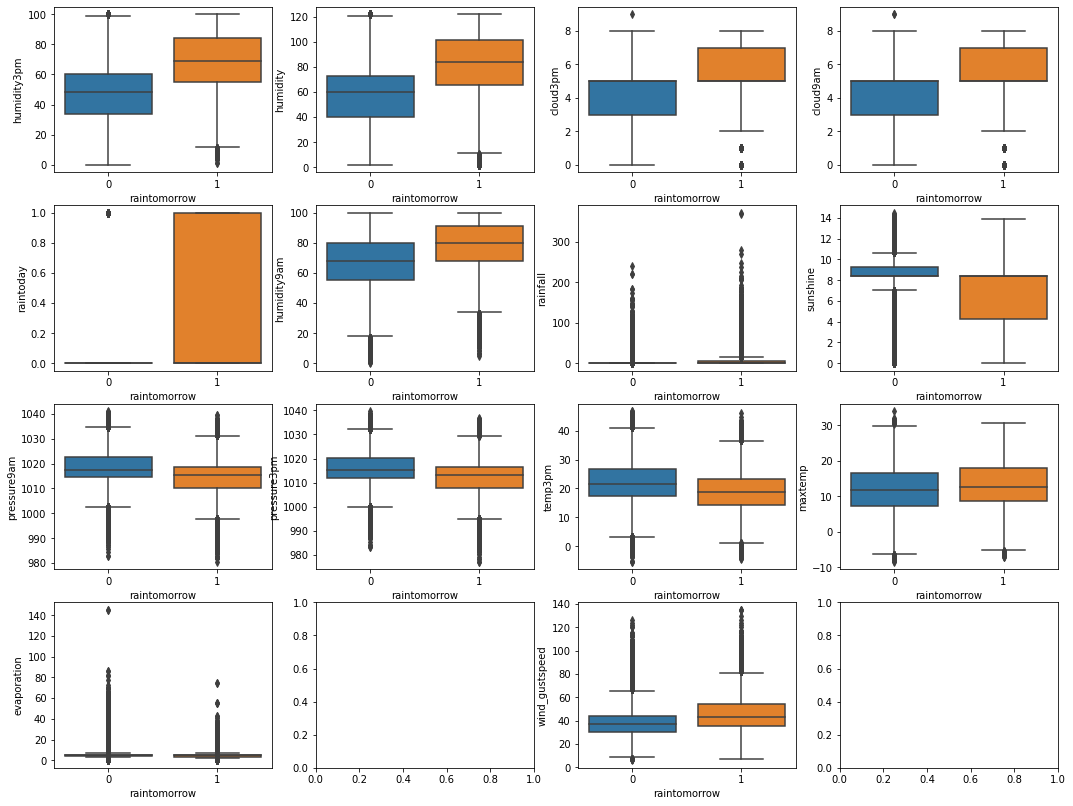

In [13]:
fig, axes = plt.subplots(4, 4, figsize = (18, 14))
sns.boxplot(data = rain_merged,  x = 'raintomorrow', y = 'humidity3pm', ax=axes[0][0])
sns.boxplot(data = rain_merged,  x = 'raintomorrow', y = 'humidity', ax=axes[0][1])
sns.boxplot(data = rain_merged,  x = 'raintomorrow', y = 'cloud3pm', ax=axes[0][2])
sns.boxplot(data = rain_merged,  x = 'raintomorrow', y = 'cloud9am', ax=axes[0][3])
sns.boxplot(data = rain_merged,  x = 'raintomorrow', y = 'raintoday', ax=axes[1][0])
sns.boxplot(data = rain_merged,  x = 'raintomorrow', y = 'humidity9am', ax=axes[1][1])
sns.boxplot(data = rain_merged,  x = 'raintomorrow', y = 'rainfall', ax=axes[1][2])
sns.boxplot(data = rain_merged,  x = 'raintomorrow', y = 'sunshine', ax=axes[1][3])
sns.boxplot(data = rain_merged,  x = 'raintomorrow', y = 'pressure9am', ax=axes[2][0])
sns.boxplot(data = rain_merged,  x = 'raintomorrow', y = 'pressure3pm', ax=axes[2][1])
sns.boxplot(data = rain_merged,  x = 'raintomorrow', y = 'temp3pm', ax=axes[2][2])
sns.boxplot(data = rain_merged,  x = 'raintomorrow', y = 'maxtemp', ax=axes[2][3])
sns.boxplot(data = rain_merged,  x = 'raintomorrow', y = 'evaporation', ax=axes[3][0])
sns.boxplot(data = rain_merged,  x = 'raintomorrow', y = 'wind_gustspeed', ax=axes[3][2])

<AxesSubplot:>

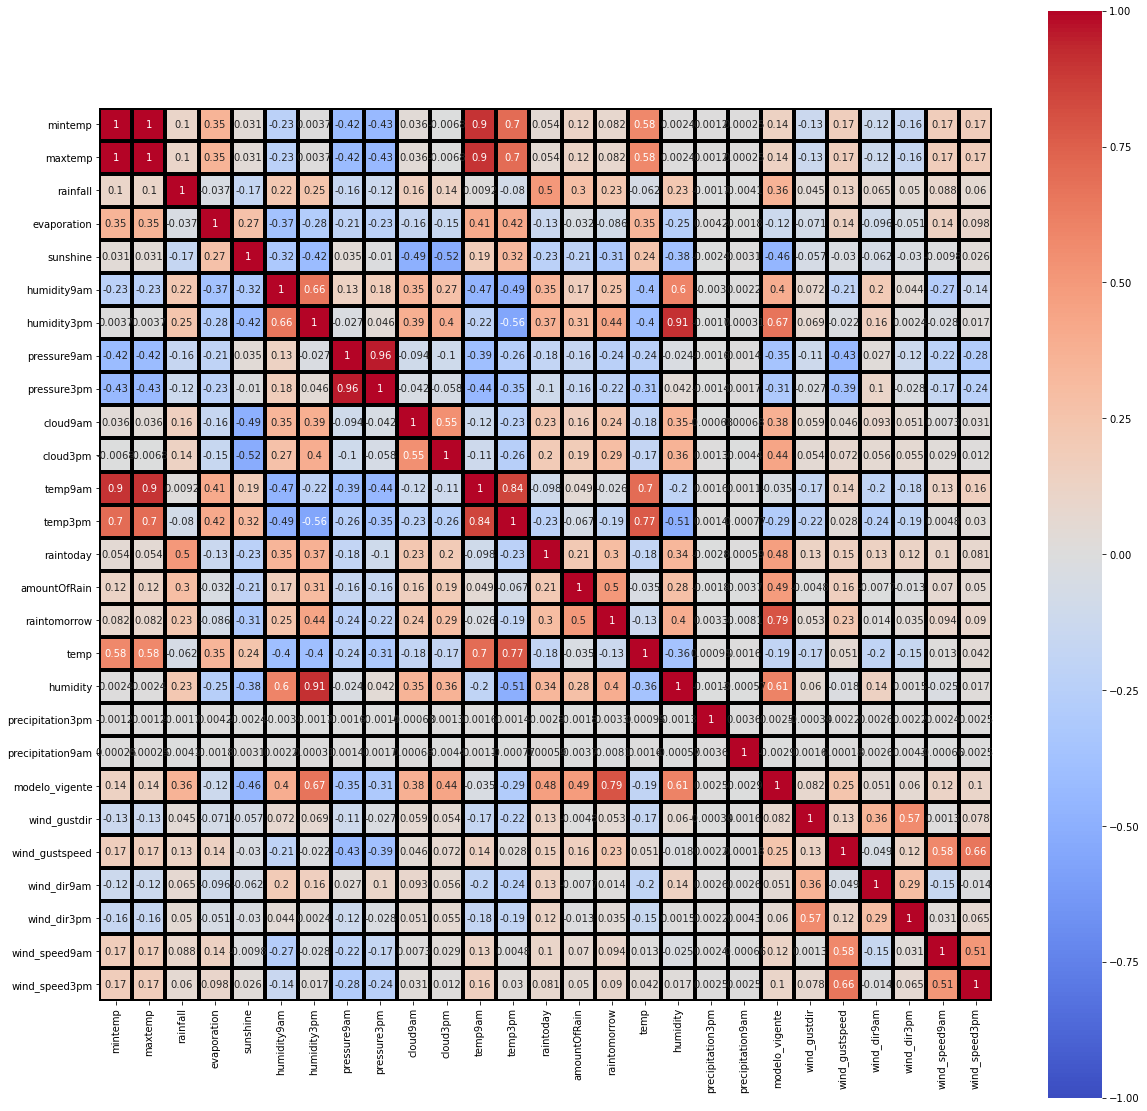

In [14]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(rain_merged.corr(), annot = True, vmin=-1, vmax=1, center= 0, fmt='.2g',
            cmap= 'coolwarm', linewidths=3, linecolor='black', square = True)

# Unbalanced Data

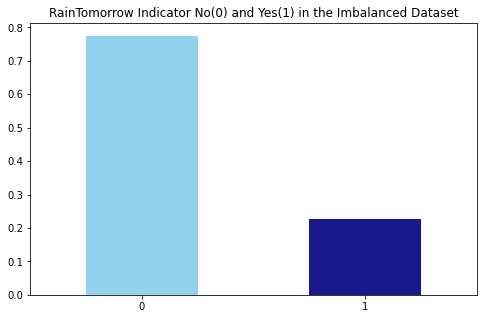

In [15]:
fig = plt.figure(figsize = (8,5))
rain_merged.raintomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

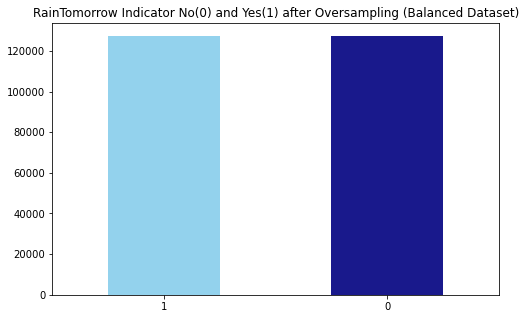

In [16]:
no = rain_merged[rain_merged.raintomorrow == 0]
yes = rain_merged[rain_merged.raintomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
rain_oversample = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
rain_oversample.raintomorrow.value_counts(normalize = False).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

# Starting the Model.

In [17]:
rain_oversample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254676 entries, 0 to 2943
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              254676 non-null  datetime64[ns]
 1   location          254676 non-null  object        
 2   mintemp           254676 non-null  float64       
 3   maxtemp           254676 non-null  float64       
 4   rainfall          254676 non-null  float64       
 5   evaporation       254676 non-null  float64       
 6   sunshine          254676 non-null  float64       
 7   humidity9am       254676 non-null  float64       
 8   humidity3pm       254676 non-null  float64       
 9   pressure9am       254676 non-null  float64       
 10  pressure3pm       254676 non-null  float64       
 11  cloud9am          254676 non-null  float64       
 12  cloud3pm          254676 non-null  float64       
 13  temp9am           254676 non-null  float64       
 14  temp3p

In [18]:
X = rain_oversample[['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am',
       'cloud3pm', 'temp9am', 'temp3pm', 'raintoday', 'precipitation3pm', 'precipitation9am', 'wind_gustdir',
       'wind_gustspeed', 'wind_dir9am', 'wind_dir3pm', 'wind_speed9am', 'wind_speed3pm']]
y = rain_oversample['raintomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [80]:
lgb1 = LGBMClassifier()
search_space = [{
    'max_depth':[3, 4, 5, 6, 7, 8, 9],
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    'learning_rate' : [0.1, 0.2, 0.3],
    'colsample_bytree' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    
}]
grid_search = GridSearchCV(lgb1, 
                           search_space, 
                           cv=KFold(3), 
                           scoring='roc_auc', 
                           n_jobs=-1, 
                           verbose=True)

grid_search.fit(X_train_std, y_train)
grid_search.best_params_

Fitting 3 folds for each of 2100 candidates, totalling 6300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 34.2min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 48.3min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 64.9min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 88.8min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 113.0min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 189.0min
[Parallel(n_jobs=-1)]: Done 6300 out of 6300 | elapsed: 197.5min finished


{'colsample_bytree': 1,
 'learning_rate': 0.3,
 'max_depth': 9,
 'n_estimators': 500}

In [20]:
lgb = LGBMClassifier(max_depth = 9, n_estimators = 500, colsample_bytree = 1, n_jobs = -1, learning_rate = 0.3)
lgb.fit(X_train_std, y_train)

LGBMClassifier(colsample_bytree=1, learning_rate=0.3, max_depth=9,
               n_estimators=500)

In [21]:
print(roc_auc_score(y_train, lgb.predict_proba(X_train_std)[:,1]))
print(roc_auc_score(y_test, lgb.predict_proba(X_test_std)[:,1]))

0.9811046405235612
0.9523406943822282


In [105]:
print(roc_auc_score(y_train, rain_merged['modelo_vigente'].iloc[y_train.index]))
print(roc_auc_score(y_test, rain_merged['modelo_vigente'].iloc[y_test.index]))

0.9556818728987304
0.9562496919642866


In [22]:
results = cross_val_score(lgb, X_train_std, y_train, cv=KFold(5, shuffle=True), scoring='roc_auc')
(np.mean(results), np.std(results))

(0.9496217754747244, 0.00122274336971019)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


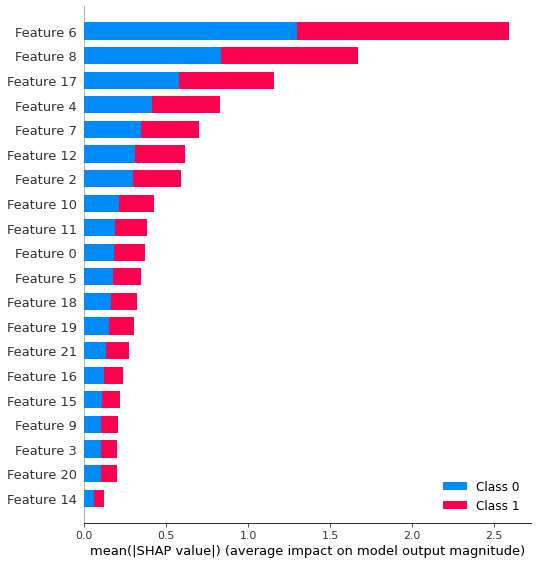

In [24]:
import shap
explainer = shap.TreeExplainer(lgb)
shap_values = explainer.shap_values(X_test_std)
shap.summary_plot(shap_values, X_test_std)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

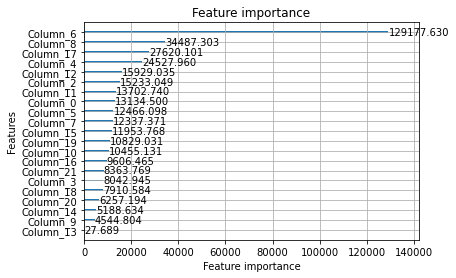

In [25]:
plot_importance(lgb, importance_type='gain')

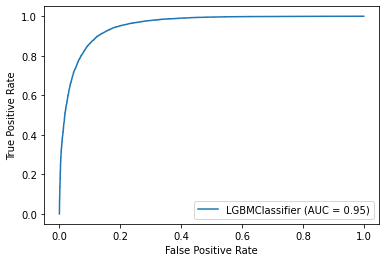

In [27]:
plot_roc_curve(lgb, X_test_std, y_test)

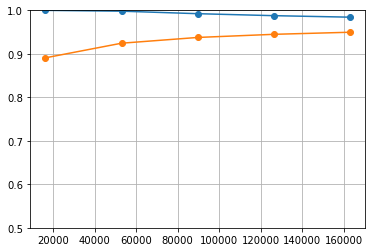

In [28]:
curves = learning_curve(lgb, X_train_std, y_train, scoring='roc_auc')

train_sizes = curves[0]
train_scores = curves[1]
test_scores = curves[2]

plt.plot(train_sizes, train_scores.mean(axis=1),'-o')
plt.plot(train_sizes, test_scores.mean(axis=1),'-o');
plt.ylim([0.5, 1])
plt.grid();